#Desarrollo de Trabajo Practico Grupal ⚛

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DatosExel = pd.read_csv('Datos-Grupo-4.csv')
tabla = pd.DataFrame(DatosExel)
datos = pd.DataFrame()
histogram = pd.DataFrame()

#Resolucion del Ejercicio 1
---

In [3]:
conteo = tabla['Deporte'].value_counts().sort_index()
datos['Datos'] = ['Básquetbol', 'Natación', 'Netball', 'Remo', 'Tenis', 'Waterpolo']
datos['Frecuencia Absoluta'] = conteo.values
datos['Frecuencia Absoluta Acumulada'] = datos['Frecuencia Absoluta'].cumsum()
datos['Frecuencia Relativa'] = round(datos['Frecuencia Absoluta'] / datos['Frecuencia Absoluta'].sum(), 2)
datos['Frecuencia Relativa Acumulada'] = round(datos['Frecuencia Relativa'].cumsum(), 2)
datos['Porcentaje'] = ((datos['Frecuencia Relativa'] * 100).round().astype(int)).apply(lambda x: str(x) + '%')
datos

,Datos,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Porcentaje
0,Básquetbol,25,25,0.19,0.19,19%
1,Natación,22,47,0.16,0.35,16%
2,Netball,23,70,0.17,0.52,17%
3,Remo,37,107,0.27,0.79,27%
4,Tenis,11,118,0.08,0.87,8%
5,Waterpolo,17,135,0.13,1.00,13%


#Resolucion del Ejercicio 2

---



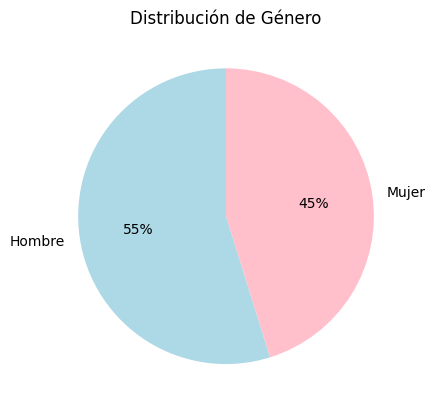

In [4]:
cantidad = tabla['Sexo'].value_counts()
etiquetas = ['Hombre', 'Mujer']
colores = ['#ADD8E6', '#FFC0CB']
plt.pie(cantidad, labels=etiquetas, autopct='%1.0f%%', startangle=90, colors=colores)
plt.title('Distribución de Género')
plt.show()

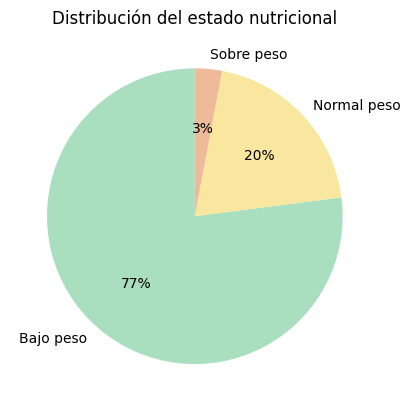

In [5]:
conteo = tabla['Estado nutricional'].value_counts()
etiquetas = ['Bajo peso', 'Normal peso', 'Sobre peso']
colores = ['#A9DFBF', '#F9E79F', '#EDBB99']
plt.pie(conteo.values, labels=etiquetas, autopct='%1.0f%%', startangle=90, colors=colores)
plt.title('Distribución del estado nutricional')
plt.show()


#Resolucion del Ejercicio 3
---



El HISTOGRAMA es la representación gráfica de una distribución de frecuencias. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

In [6]:
intervalos = round(math.log2(len(DatosExel.N)))

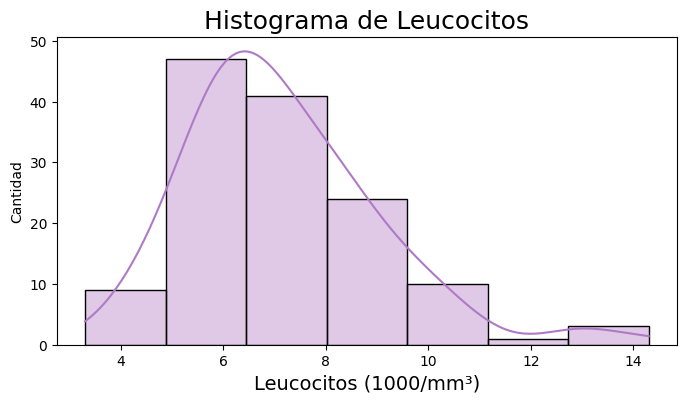

In [7]:
ax = sns.histplot(DatosExel.Leucocitos, kde=True, color='#AF7AC5', alpha=.4, bins=intervalos)
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma de Leucocitos', fontsize=18)
ax.set_xlabel('Leucocitos (1000/mm³)', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=10)
plt.show()

In [8]:
#@title

tabla_intervalos = pd.cut(DatosExel.Leucocitos, bins=intervalos)
tabla_frecuencias = pd.value_counts(tabla_intervalos).reset_index()
tabla_frecuencias.columns = ['Intervalo', 'Frecuencia']
tabla_frecuencias = tabla_frecuencias.sort_values('Intervalo').reset_index(drop=True)
tabla_frecuencias['Absolutas acumuladas'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Relativas'] = (tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()).round(2)
tabla_frecuencias['Relativas acumuladas'] = tabla_frecuencias['Relativas'].cumsum().round(2)
tabla_frecuencias

,Intervalo,Frecuencia,Absolutas acumuladas,Relativas,Relativas acumuladas
0,"(3.289, 4.871]",9,9,0.07,0.07
1,"(4.871, 6.443]",47,56,0.35,0.42
2,"(6.443, 8.014]",41,97,0.30,0.72
3,"(8.014, 9.586]",24,121,0.18,0.90
4,"(9.586, 11.157]",10,131,0.07,0.97
5,"(11.157, 12.729]",1,132,0.01,0.98
6,"(12.729, 14.3]",3,135,0.02,1.00


#Resolucion del Ejercicio 4
---


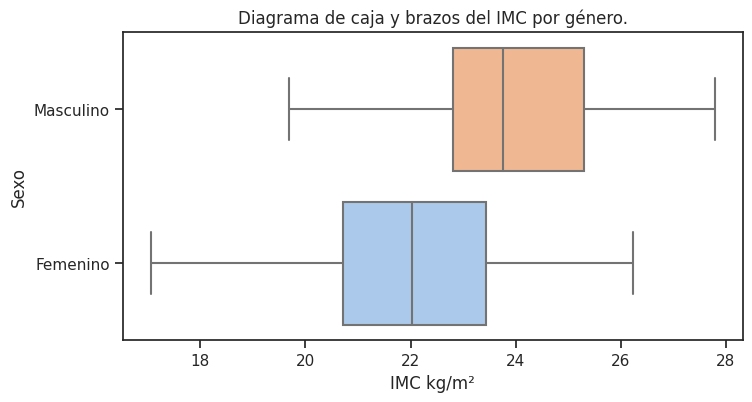

In [24]:
tabla['Sexo'] = tabla['Sexo'].replace({1: 'Masculino', 2: 'Femenino'})
plt.figure(figsize=(8, 4))
sns.boxplot(data=tabla, y="Sexo", x="IMC", palette="pastel")
plt.title('Diagrama de caja y brazos del IMC por género.')
plt.xlabel('IMC kg/m²')
plt.ylabel('Sexo')
plt.gca().invert_yaxis()
plt.show()

#Resolucion del Ejercicio 5
---


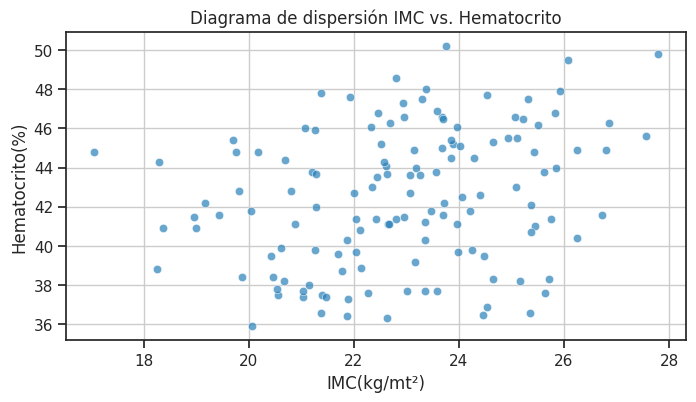

In [10]:
disper = sns.scatterplot(data=DatosExel, x="IMC", y="Hematocrito", color='#2980B9', alpha=0.7)
disper.figure.set_size_inches(8,4)
plt.title('Diagrama de dispersión IMC vs. Hematocrito')
plt.xlabel('IMC(kg/mt²)')
plt.ylabel('Hematocrito(%)')
plt.grid(True)
plt.show()

#Resolucion del Ejercicio 6

> Bloc con sangría


---

In [11]:
leucocitos_stats = tabla['Leucocitos'].describe()
mediana_leucocitos = leucocitos_stats['50%']
primer_cuartil_leucocitos = leucocitos_stats['25%']
tercer_cuartil_leucocitos = leucocitos_stats['75%']

hematocrito_stats = tabla['Hematocrito'].describe()
desvio_estandar_hematocrito = hematocrito_stats['std']

eritrocitos_stats = tabla['Eritrocitos'].describe()

In [12]:
print("Estadísticas de Leucocitos:")
print("Mediana:", mediana_leucocitos)
print("1er Cuartil:", primer_cuartil_leucocitos)
print("3er Cuartil:", tercer_cuartil_leucocitos)

print("\nEstadísticas de Hematocrito:")
print("Desvío Estándar:", desvio_estandar_hematocrito)

print("\nEstadísticas de Eritrocitos:")
print(eritrocitos_stats)

Estadísticas de Leucocitos:
Mediana: 6.8
1er Cuartil: 5.9
3er Cuartil: 8.3

Estadísticas de Hematocrito:
Desvío Estándar: 3.4945985328035376

Estadísticas de Eritrocitos:
count    135.000000
mean       4.640963
std        0.425930
min        3.800000
25%        4.310000
50%        4.570000
75%        5.015000
max        5.660000
Name: Eritrocitos, dtype: float64


#Resolucion del Ejercicio 6 Con NUMPY

> Bloc con sangría


---

In [25]:
#------LEUCOCITOS------
#------MEDIANA------
data_mediana = tabla['Leucocitos'].values
mediana_leuco = np.median(data_mediana)
#-----1er Cuartil-----
data_Cuartil = tabla['Leucocitos']
primer_cuartil_leu = np.percentile(data_Cuartil, 25)
#-----3er Cuartil-----
tercer_cuartil_leu = np.percentile(data_Cuartil, 75)

#-----HEMATOCRITO-----
#-----Desvio estandar-----
data_hematocrito = tabla['Hematocrito']
desvio_estandar_hema = np.std(data_hematocrito)

#-----ERITROCITOS-----
#-----mediana
data_mediana_eritrocitos = tabla['Eritrocitos'].values
mediana_eritrocitos = np.median(data_mediana_eritrocitos)
#----media----
data_eritrocitos = tabla['Eritrocitos']
media_eritrocito = np.mean(data_eritrocitos)
#----1er cuartil-----
primer_cuartil_eri = np.percentile(data_eritrocitos, 25)
#----3er cuartil-----
tercer_cuartil_eri = np.percentile(data_eritrocitos, 75)
#----desvio estandar-----
desvio_estandar_eri = np.std(data_eritrocitos)
#----minimo----
minimo_eri = np.min(data_eritrocitos)
#----maximo----
maximo_eri = np.max(data_eritrocitos)

In [26]:
print("LEUCOCITOS:")
print("Mediana de los leucocitos:", mediana_leuco)
print("1er cuartil de los leucocitos:", primer_cuartil_leu)
print("3er Cuartil de los leucocitos:", tercer_cuartil_leu)
print("\nHEMATOCRITOS")
print("Desvio estandar del Hematocrito:", desvio_estandar_hema)
print("\nERITROCITOS")
print("Mediana de los Eritrocitos:", mediana_eritrocitos)
print("Media de los Eritrocitos:", media_eritrocito)
print("Primer cuartil:", primer_cuartil_eri)
print("Tercer Cuartil:", tercer_cuartil_eri)
print("Desvio estandar de los Eritrocitos:", desvio_estandar_eri)
print("Minimo eritrocitos:", minimo_eri)
print("Maximo eritrocitos", maximo_eri)

LEUCOCITOS:
Mediana de los leucocitos: 6.8
1er cuartil de los leucocitos: 5.9
3er Cuartil de los leucocitos: 8.3

HEMATOCRITOS
Desvio estandar del Hematocrito: 3.4816315176496433

ERITROCITOS
Mediana de los Eritrocitos: 4.57
Media de los Eritrocitos: 4.640962962962963
Primer cuartil: 4.31
Tercer Cuartil: 5.015
Desvio estandar de los Eritrocitos: 0.4243493914637622
Minimo eritrocitos: 3.8
Maximo eritrocitos 5.66
